##### 調整圖片亮度對比、飽和度、銳利度
這篇教學會綜合 PyQt5 的「開啟並顯示圖片」、「圖片轉檔儲存」以及「在視窗中開啟視窗」等文章範例，實際製作點一個可以開啟圖片，\
並且透過滑桿調整圖片亮度對比、飽和度與銳利度，完成後後儲存圖片為 JPG 或 PNG 的應用。

##### 介面設計 
這個範例的介面設計，需要在畫面左側放入顯示圖片的「畫布」，畫面右側放入對應的「按鈕」以及調整「滑桿」，\
參考 QLabel 標籤、QPushButton 按鈕 和 QSlider 數值調整滑桿 三篇範例教學，將對應的元件放入畫面中。

* 函式庫需要 QtGui、QtCore 和 PIL。
* 下方程式碼先註解 connect 會需要用到的函式 ( 先聚焦在介面設計 )，避免執行時發生錯誤。

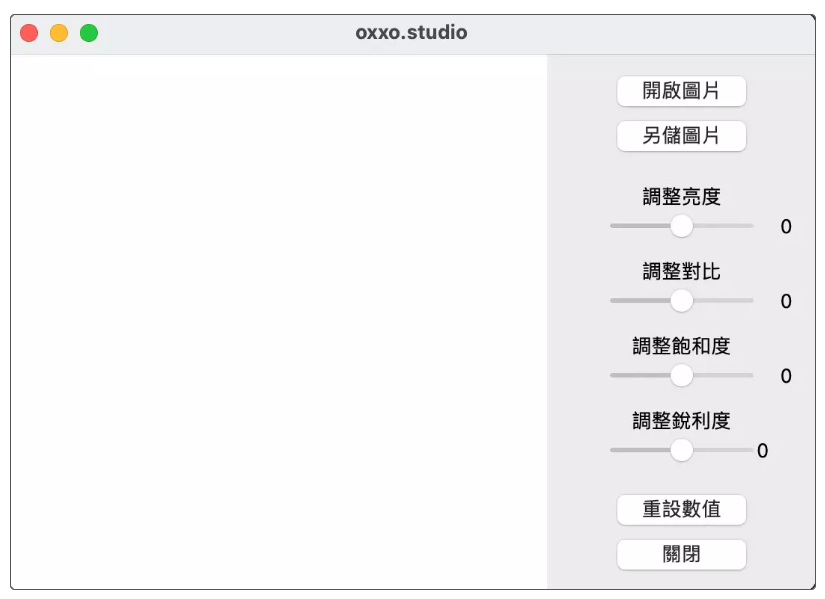

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
from PIL import Image, ImageQt, ImageEnhance

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')
        self.resize(540, 360)
        self.setUpdatesEnabled(True)
        self.img = False    # 建立一個變數儲存圖片
        self.ui()
        self.adjustUi()

    # 主要按鈕和文字標籤
    def ui(self):
        self.canvas = QPixmap(360,360)         # 建立畫布元件
        self.canvas.fill(QColor('#ffffff'))    # 預設填滿白色
        self.label = QtWidgets.QLabel(self)    # 建立 QLabel 元件，作為顯示圖片使用
        self.label.setGeometry(0, 0, 360, 360) # 設定位置和尺寸
        self.label.setPixmap(self.canvas)      # 放入畫布元件

        self.mbox = QtWidgets.QMessageBox(self)        # 建立對話視窗元件

        self.btn_open = QtWidgets.QPushButton(self)    # 開啟圖片按鈕
        self.btn_open.setText('開啟圖片')
        self.btn_open.setGeometry(400, 10, 100, 30)
        # self.btn_open.clicked.connect(self.newFile)

        self.btn_save = QtWidgets.QPushButton(self)    # 另存圖片按鈕
        self.btn_save.setText('另存圖片')
        self.btn_save.setGeometry(400, 40, 100, 30)
        # self.btn_save.clicked.connect(self.saveFile)

        self.btn_reset = QtWidgets.QPushButton(self)    # 重設數值按鈕
        self.btn_reset.setText('重設數值')
        self.btn_reset.setGeometry(400, 290, 100, 30)
        # self.btn_reset.clicked.connect(self.resetVal)

        self.btn_close = QtWidgets.QPushButton(self)    # 關閉視窗按鈕
        self.btn_close.setText('關閉')
        self.btn_close.setGeometry(400, 320, 100, 30)
        # self.btn_close.clicked.connect(self.closeFile)

    # 調整數值拉霸
    def adjustUi(self):
        self.label_adj_1 = QtWidgets.QLabel(self)       # 調整亮度說明文字
        self.label_adj_1.setGeometry(400, 80, 100, 30)
        self.label_adj_1.setText('調整亮度')
        self.label_adj_1.setAlignment(Qt.AlignCenter)

        self.label_val_1 = QtWidgets.QLabel(self)       # 調整亮度數值
        self.label_val_1.setGeometry(500, 100, 40, 30)
        self.label_val_1.setText('0')
        self.label_val_1.setAlignment(Qt.AlignCenter)

        self.slider_1 = QtWidgets.QSlider(self)         # 調整亮度滑桿
        self.slider_1.setOrientation(1)
        self.slider_1.setGeometry(400,100,100,30)
        self.slider_1.setRange(-100, 100)
        self.slider_1.setValue(0)
        # self.slider_1.valueChanged.connect(self.showImage)

        self.label_adj_2 = QtWidgets.QLabel(self)       # 調整對比說明文字
        self.label_adj_2.setGeometry(400, 130, 100, 30)
        self.label_adj_2.setText('調整對比')
        self.label_adj_2.setAlignment(Qt.AlignCenter)

        self.label_val_2 = QtWidgets.QLabel(self)       # 調整對比數值
        self.label_val_2.setGeometry(500, 150, 40, 30)
        self.label_val_2.setText('0')
        self.label_val_2.setAlignment(Qt.AlignCenter)

        self.slider_2 = QtWidgets.QSlider(self)         # 調整對比滑桿
        self.slider_2.setOrientation(1)
        self.slider_2.setGeometry(400,150,100,30)
        self.slider_2.setRange(-100, 100)
        self.slider_2.setValue(0)
        # self.slider_2.valueChanged.connect(self.showImage)

        self.label_adj_3 = QtWidgets.QLabel(self)       # 調整飽和度說明文字
        self.label_adj_3.setGeometry(400, 180, 100, 30)
        self.label_adj_3.setText('調整飽和度')
        self.label_adj_3.setAlignment(Qt.AlignCenter)

        self.label_val_3 = QtWidgets.QLabel(self)       # 調整飽和度數值
        self.label_val_3.setGeometry(500, 200, 40, 30)
        self.label_val_3.setText('0')
        self.label_val_3.setAlignment(Qt.AlignCenter)

        self.slider_3 = QtWidgets.QSlider(self)         # 調整飽和度滑桿
        self.slider_3.setOrientation(1)
        self.slider_3.setGeometry(400,200,100,30)
        self.slider_3.setRange(-100, 100)
        self.slider_3.setValue(0)
        # self.slider_3.valueChanged.connect(self.showImage)

        self.label_adj_4 = QtWidgets.QLabel(self)       # 調整銳利度說明文字
        self.label_adj_4.setGeometry(400, 230, 100, 30)
        self.label_adj_4.setText('調整銳利度')
        self.label_adj_4.setAlignment(Qt.AlignCenter)

        self.label_val_4 = QtWidgets.QLabel(self)       # 調整銳利度數值
        self.label_val_4.setGeometry(500, 250, 40, 30)
        self.label_val_4.setText('0')
        # self.label_val_4.setAlignment(Qt.AlignCenter)

        self.slider_4 = QtWidgets.QSlider(self)         # 調整銳利度滑桿
        self.slider_4.setOrientation(1)
        self.slider_4.setGeometry(400,250,100,30)
        self.slider_4.setRange(-100, 100)
        self.slider_4.setValue(0)
        # self.slider_4.valueChanged.connect(self.showImage)

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())

##### 開啟圖片 
在 class MyWidget 裡加入 newFile 和 closeFile 兩個新方法 ( 函式 )，對應到點擊開啟圖片和關閉的按鈕，\
當使用者點擊關閉按鈕時 ( 解除 connect 註解 )，會彈出對話視窗詢問是否關閉，當點擊開啟圖片時 ( 解除 connect 註解 )，\
會彈出選擇檔案的視窗，選擇檔案後，會透過 Pillow 的 Image 方法開啟圖片，再藉由 ImageQt.toqimage 轉換成 Qpixmap 的格式顯示在畫布中。

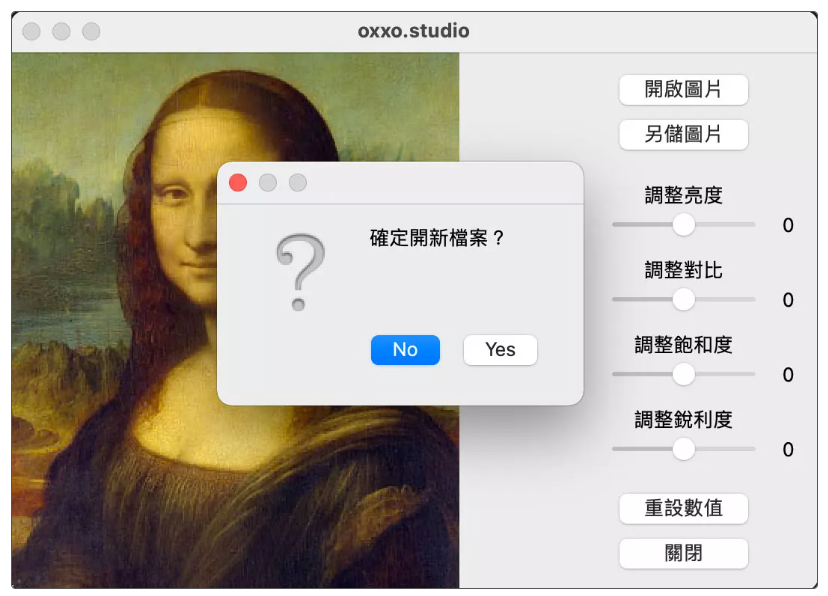

In [ ]:
# 開新圖片
def newFile(self):
    global output      # 建立一個全域變數，在不同視窗之間傳遞圖片資訊
    filePath , filetype = QtWidgets.QFileDialog.getOpenFileName(filter='IMAGE(*.jpg *.png *.gif)')
    if filePath:
        # 如果選擇檔案，彈出視窗詢問是否開啟
        ret = self.mbox.question(self, 'question', '確定開新檔案？')
        # 如果確定開啟
        if ret == self.mbox.Yes:
            self.img = Image.open(filePath)                 # 使用 Pillow Image 開啟
            output = self.img                               # 紀錄圖片資訊
            qimg = ImageQt.toqimage(self.img)               # 轉換成 Qpixmap 格式
            self.canvas = QPixmap(360,360).fromImage(qimg)  # 顯示在畫布中
            self.label.setPixmap(self.canvas)               # 重設畫布內容
            self.update()                                   # 更新視窗
        else:
            return

# 關閉
def closeFile(self):
    ret = self.mbox.question(self, 'question', '確定關閉視窗？')
    if ret == self.mbox.Yes:
        app.quit()            #如果點擊 yes，關閉視窗
    else:
        return

##### 調整圖片亮度對比、飽和度、銳利度 
接著在 class MyWidget 裡加入 resetVal 和 showImage 兩個新方法 ( 函式 )，resetVal 對應到重設按鈕 ( 解除 connect 註解 )，\
showImage 拖拉調整滑桿時的程式，當中透過 ImageEnhance.Brightness 調整亮度，ImageEnhance.Contrast 調整對比，\
ImageEnhance.Color 調整飽和度，ImageEnhance.Sharpnes 調整銳利度。

* 參考：Pillow 調整圖片亮度、對比、飽和度和銳利度

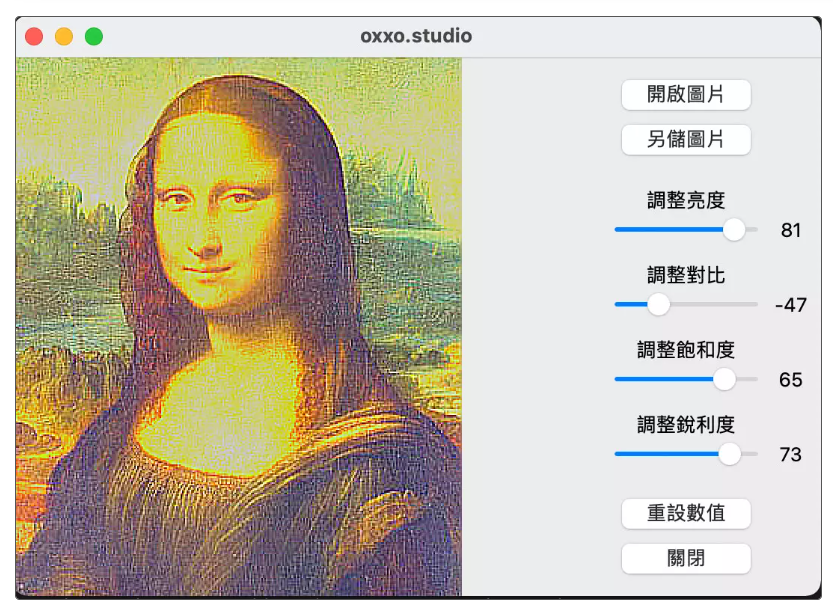

In [ ]:
# 重設
def resetVal(self):
    self.slider_1.setValue(0)        # 滑桿預設值 0
    self.slider_2.setValue(0)        # 滑桿預設值 0
    self.slider_3.setValue(0)        # 滑桿預設值 0
    self.slider_4.setValue(0)        # 滑桿預設值 0
    self.label_val_1.setText('0')    # 滑桿數值顯示 0
    self.label_val_2.setText('0')    # 滑桿數值顯示 0
    self.label_val_3.setText('0')    # 滑桿數值顯示 0
    self.label_val_4.setText('0')    # 滑桿數值顯示 0
    qimg = ImageQt.toqimage(self.img)               # 圖片顯示 self.img 內容
    self.canvas = QPixmap(360,360).fromImage(qimg)  # 更新畫布內容
    self.label.setPixmap(self.canvas)               # 重設畫布
    self.update()                                   # 更新視窗

# 調整並顯示圖片
def showImage(self):
    global output
    # 如果已經開啟圖片
    if self.img != False:
        val1 = self.slider_1.value()         # 取得滑桿數值
        val2 = self.slider_2.value()         # 取得滑桿數值
        val3 = self.slider_3.value()         # 取得滑桿數值
        val4 = self.slider_4.value()         # 取得滑桿數值
        self.label_val_1.setText(str(val1))  # 顯示滑桿數值
        self.label_val_2.setText(str(val2))  # 顯示滑桿數值
        self.label_val_3.setText(str(val3))  # 顯示滑桿數值
        self.label_val_4.setText(str(val4))  # 顯示滑桿數值
        output = self.img.copy()                        # 複製 img 圖片 ( 避免更動原始圖片 )
        brightness = ImageEnhance.Brightness(output)    # 調整亮度
        output = brightness.enhance(1+int(val1)/100)    # 讀取滑桿數值並轉換成調整的數值
        contrast = ImageEnhance.Contrast(output)        # 調整對比
        output = contrast.enhance(1+int(val2)/100)      # 讀取滑桿數值並轉換成調整的數值
        color = ImageEnhance.Color(output)              # 調整飽和度
        output = color.enhance(1+int(val3)/100)         # 讀取滑桿數值並轉換成調整的數值
        sharpness = ImageEnhance.Sharpness(output)      # 調整銳利度
        output = sharpness.enhance(1+int(val4)/10)      # 讀取滑桿數值並轉換成調整的數值

        qimg = ImageQt.toqimage(output)                 # 圖片顯示 self.img 內容
        self.canvas = QPixmap(360,360).fromImage(qimg)  # 更新畫布內容
        self.label.setPixmap(self.canvas)               # 重設畫布
        self.update()                                   # 更新視窗

##### 開新視窗，設定另存圖片格式 
在 class MyWidget 裡加入 saveFile 新方法 ( 函式 )，對應到點擊另存圖片按鈕，當使用者點擊另存圖片按鈕時 ( 解除 connect 註解 )，會開啟新的視窗。

In [ ]:
def saveFile(self):
    self.nw = saveWindow()      # 連接新視窗
    self.nw.show()              # 顯示新視窗

在程式中新增另外一個名為 saveWindow 的 class 負責新視窗的顯示，當中使用的程式為「開啟圖片轉檔儲存 ( 可調整品質與尺寸 )」的範例程式，\
開啟新視窗後，可以選擇儲存的格式和尺寸，按下確認後彈出對話視窗，選擇 yes 就會另存圖片。

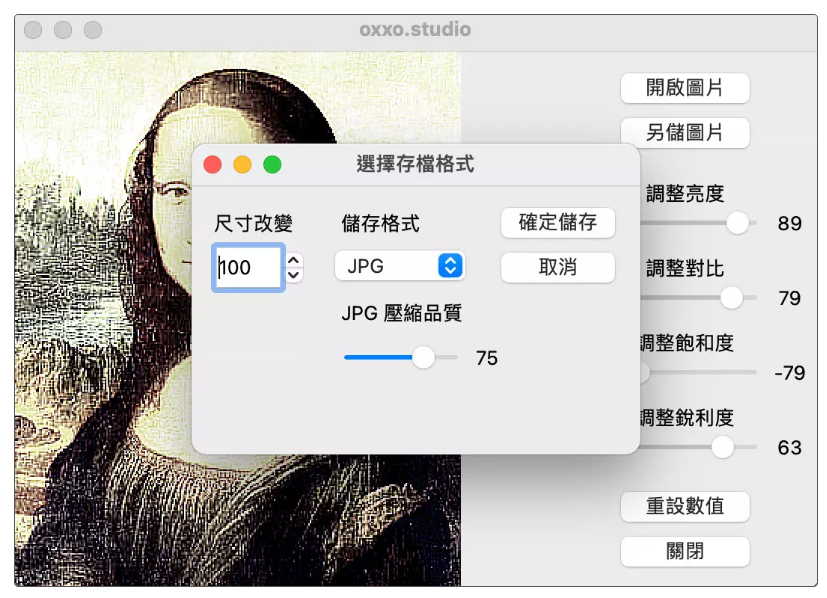

In [ ]:
class saveWindow(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('選擇存檔格式')    # 新視窗標題
        self.resize(300, 180)                # 新視窗尺寸
        self.ui()

    def ui(self):
        self.label_size = QtWidgets.QLabel(self)     # 顯示尺寸縮放比例說明文字
        self.label_size.setGeometry(15, 10, 80, 30)
        self.label_size.setText('尺寸改變')

        self.imgsize =100                            # 預設圖片尺寸縮放比例

        self.box_size = QtWidgets.QSpinBox(self)     # 尺寸縮放調整元件
        self.box_size.setGeometry(15, 40, 60, 30)
        self.box_size.setRange(0,200)
        self.box_size.setValue(self.imgsize)
        self.box_size.valueChanged.connect(self.changeSize) # 串連調整函式

        self.label_format = QtWidgets.QLabel(self)   # 存檔格式說明文字
        self.label_format.setGeometry(100, 10, 100, 30)
        self.label_format.setText('儲存格式')

        self.format = 'JPG'                          # 預設格式

        self.box_format  = QtWidgets.QComboBox(self) # 下拉選單元件
        self.box_format.addItems(['JPG','PNG'])      # 兩個選項
        self.box_format.setGeometry(90,40,100,30)
        self.box_format.currentIndexChanged.connect(self.changeFormat) # 串連改變時的程式

        self.label_jpg = QtWidgets.QLabel(self)      # 壓縮品質說明文字
        self.label_jpg.setGeometry(100, 70, 100, 30)
        self.label_jpg.setText('JPG 壓縮品質')

        self.val = 75                                # 預設 JPG 壓縮品質

        self.label_jpg_val = QtWidgets.QLabel(self)  # 壓縮品質數值
        self.label_jpg_val.setGeometry(190, 100, 100, 30)
        self.label_jpg_val.setText(str(self.val))

        self.slider = QtWidgets.QSlider(self)        # 壓縮品質調整滑桿
        self.slider.setOrientation(1)                # 水平顯示
        self.slider.setGeometry(100,100,80,30)
        self.slider.setRange(0, 100)                 # 數值範圍
        self.slider.setValue(self.val)               # 預設值
        self.slider.valueChanged.connect(self.changeVal)  # 串連改變時的函式

        self.btn_ok = QtWidgets.QPushButton(self)    # 確定儲存按鈕
        self.btn_ok.setText('確定儲存')
        self.btn_ok.setGeometry(200, 10, 90, 30)
        self.btn_ok.clicked.connect(self.saveImage)  # 串連儲存函式

        self.btn_cancel = QtWidgets.QPushButton(self)  # 取消儲存按鈕
        self.btn_cancel.setText('取消')
        self.btn_cancel.setGeometry(200, 40, 90, 30)
        self.btn_cancel.clicked.connect(self.closeWindow)  # 串連關閉視窗函式

    # 改變尺寸
    def changeSize(self):
        self.imgsize = self.box_size.value()         # 取得改變的數值

    # 改變格式
    def changeFormat(self):
        self.format = self.box_format.currentText()  # 顯示目前格式
        if self.format == 'JPG':
            self.label_jpg.setDisabled(False)        # 如果是 JPG，啟用 JPG 壓縮品質調整相關元件
            self.label_jpg_val.setDisabled(False)
            self.slider.setDisabled(False)
        else:
            self.label_jpg.setDisabled(True)        # 如果是 JPG，停用 JPG 壓縮品質調整相關元件
            self.label_jpg_val.setDisabled(True)
            self.slider.setDisabled(True)

    # 改變數值
    def changeVal(self):
        self.val = self.slider.value()              # 取得滑桿數值
        self.label_jpg_val.setText(str(self.slider.value()))

    # 存檔
    def saveImage(self):
        global output
        if self.format == 'JPG':
            filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='JPG(*.jpg)')
            if filePath:
                nw = int ( output.size[0] * self.imgsize/100 )    # 根據縮放比例調整大小
                nh = int ( output.size[1] * self.imgsize/100 )
                img2 = output.resize((nw, nh))                    # 調整大小
                img2.save(filePath, quality=self.val, subsampling=0)  # JPG 存檔
                self.close()
        else:
            filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='PNG(*.png)')
            if filePath:
                nw = int ( output.size[0] * self.imgsize/100 )    # 根據縮放比例調整大小
                nh = int ( output.size[1] * self.imgsize/100 )
                img2 = output.resize((nw, nh))                    # 調整大小
                img2.save(filePath, 'png')                        # PNG 存檔
                self.close()

    def closeWindow(self):
        self.close()

完整程式碼

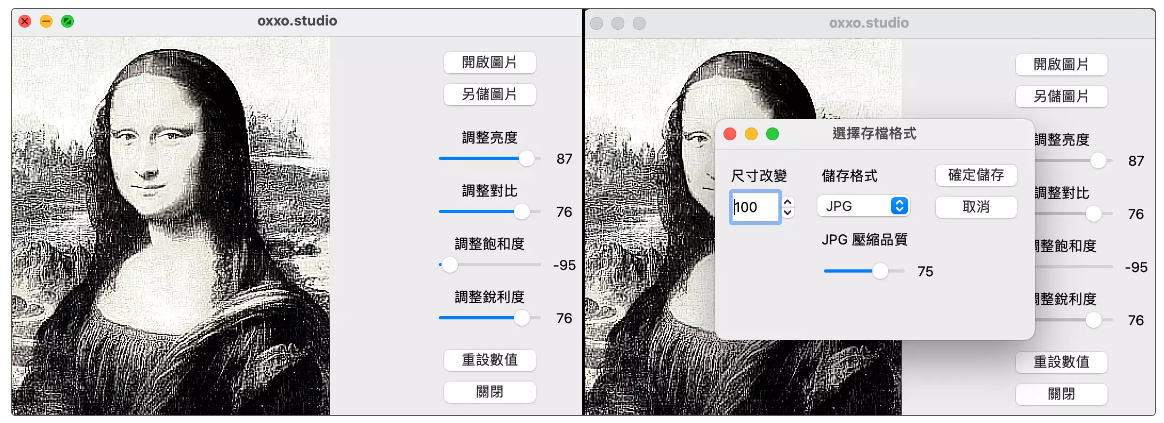

### 解釋：
* 初始化: 應用啟動並初始化窗口及其控件，包括標籤、按鈕和滑動條。
*檔案操作: 提供開啟、儲存圖片的功能。使用 QFileDialog 來實現檔案的選擇。
* 圖片調整: 使用滑動條來調整圖片的亮度、對比度、飽和度和銳利度。
* 圖片處理: 利用 PIL（Python Imaging Library）來處理圖片，並使用 ImageQt 將 PIL 的圖片對象轉換為 QPixmap 以在標籤上顯示。
* 儲存設定: 提供一個新窗口來設置儲存圖片的格式和品質，並提供確定儲存和取消的選項。

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
from PIL import Image, ImageQt, ImageEnhance

class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('oxxo.studio')  # 設置窗口標題
        self.resize(540, 360)  # 設置窗口大小
        self.setUpdatesEnabled(True)  # 啟用或禁用窗口更新
        self.img = False  # 初始化圖片變量
        self.ui()  # 建立UI介面
        self.adjustUi()  # 建立調整控制介面

    def ui(self):
        # 初始化畫布
        self.canvas = QPixmap(360,360)
        self.canvas.fill(QColor('#ffffff'))  # 設置畫布背景為白色
        self.label = QtWidgets.QLabel(self)  # 創建一個標籤用於顯示圖片
        self.label.setGeometry(0, 0, 360, 360)  # 設置標籤位置和大小
        self.label.setPixmap(self.canvas)  # 將畫布放到標籤上顯示

        self.mbox = QtWidgets.QMessageBox(self)  # 創建消息對話框

        # 創建開啟圖片按鈕
        self.btn_open = QtWidgets.QPushButton(self)
        self.btn_open.setText('開啟圖片')
        self.btn_open.setGeometry(400, 10, 100, 30)
        self.btn_open.clicked.connect(self.newFile)

        # 創建保存圖片按鈕
        self.btn_save = QtWidgets.QPushButton(self)
        self.btn_save.setText('另儲圖片')
        self.btn_save.setGeometry(400, 40, 100, 30)
        self.btn_save.clicked.connect(self.saveFile)

        # 創建重設數值按鈕
        self.btn_reset = QtWidgets.QPushButton(self)
        self.btn_reset.setText('重設數值')
        self.btn_reset.setGeometry(400, 290, 100, 30)
        self.btn_reset.clicked.connect(self.resetVal)

        # 創建關閉窗口按鈕
        self.btn_close = QtWidgets.QPushButton(self)
        self.btn_close.setText('關閉')
        self.btn_close.setGeometry(400, 320, 100, 30)
        self.btn_close.clicked.connect(self.closeFile)

    def newFile(self):
        # 打開文件對話框選擇圖片
        filePath , filetype = QtWidgets.QFileDialog.getOpenFileName(filter='IMAGE(*.jpg *.png *.gif)')
        if filePath:
            # 確認是否要開啟新檔案
            ret = self.mbox.question(self, 'question', '確定開新檔案？')
            if ret == self.mbox.Yes:
                self.img = Image.open(filePath)
                qimg = ImageQt.toqimage(self.img)
                self.canvas = QPixmap(360,360).fromImage(qimg)
                self.label.setPixmap(self.canvas)
                self.update()

    def saveFile(self):
        # 創建並顯示保存窗口
        self.nw = saveWindow()
        self.nw.show()

    def closeFile(self):
        # 關閉窗口前確認
        ret = self.mbox.question(self, 'question', '確定關閉視窗？')
        if ret == self.mbox.Yes:
            app.quit()

    def adjustUi(self):
        # 建立亮度、對比度、飽和度、銳利度調節的界面
        # 每個調節項目包括一個標籤、滑動條和顯示當前值的標籤
        # 例如調整亮度：
        self.label_adj_1 = QtWidgets.QLabel(self)
        self.label_adj_1.setGeometry(400, 80, 100, 30)
        self.label_adj_1.setText('調整亮度')
        self.label_adj_1.setAlignment(Qt.AlignCenter)

        self.label_val_1 = QtWidgets.QLabel(self)
        self.label_val_1.setGeometry(500, 100, 40, 30)
        self.label_val_1.setText('0')
        self.label_val_1.setAlignment(Qt.AlignCenter)

        self.slider_1 = QtWidgets.QSlider(self)
        self.slider_1.setOrientation(1)
        self.slider_1.setGeometry(400,100,100,30)
        self.slider_1.setRange(-100, 100)
        self.slider_1.setValue(0)
        self.slider_1.valueChanged.connect(self.showImage)

        self.label_adj_2 = QtWidgets.QLabel(self)
        self.label_adj_2.setGeometry(400, 130, 100, 30)
        self.label_adj_2.setText('調整對比')
        self.label_adj_2.setAlignment(Qt.AlignCenter)

        self.label_val_2 = QtWidgets.QLabel(self)
        self.label_val_2.setGeometry(500, 150, 40, 30)
        self.label_val_2.setText('0')
        self.label_val_2.setAlignment(Qt.AlignCenter)

        self.slider_2 = QtWidgets.QSlider(self)
        self.slider_2.setOrientation(1)
        self.slider_2.setGeometry(400,150,100,30)
        self.slider_2.setRange(-100, 100)
        self.slider_2.setValue(0)
        self.slider_2.valueChanged.connect(self.showImage)

        self.label_adj_3 = QtWidgets.QLabel(self)
        self.label_adj_3.setGeometry(400, 180, 100, 30)
        self.label_adj_3.setText('調整飽和度')
        self.label_adj_3.setAlignment(Qt.AlignCenter)

        self.label_val_3 = QtWidgets.QLabel(self)
        self.label_val_3.setGeometry(500, 200, 40, 30)
        self.label_val_3.setText('0')
        self.label_val_3.setAlignment(Qt.AlignCenter)

        self.slider_3 = QtWidgets.QSlider(self)
        self.slider_3.setOrientation(1)
        self.slider_3.setGeometry(400,200,100,30)
        self.slider_3.setRange(-100, 100)
        self.slider_3.setValue(0)
        self.slider_3.valueChanged.connect(self.showImage)

        self.label_adj_4 = QtWidgets.QLabel(self)
        self.label_adj_4.setGeometry(400, 230, 100, 30)
        self.label_adj_4.setText('調整銳利度')
        self.label_adj_4.setAlignment(Qt.AlignCenter)

        self.label_val_4 = QtWidgets.QLabel(self)
        self.label_val_4.setGeometry(500, 250, 40, 30)
        self.label_val_4.setText('0')
        self.label_val_4.setAlignment(Qt.AlignCenter)

        self.slider_4 = QtWidgets.QSlider(self)
        self.slider_4.setOrientation(1)
        self.slider_4.setGeometry(400,250,100,30)
        self.slider_4.setRange(-100, 100)
        self.slider_4.setValue(0)
        self.slider_4.valueChanged.connect(self.showImage)

    def resetVal(self):
        # 重設所有滑動條值為0，並更新顯示圖片
        self.slider_1.setValue(0)
        self.slider_2.setValue(0)
        self.slider_3.setValue(0)
        self.slider_4.setValue(0)
        self.label_val_1.setText('0')
        self.label_val_2.setText('0')
        self.label_val_3.setText('0')
        self.label_val_4.setText('0')
        qimg = ImageQt.toqimage(self.img)
        self.canvas = QPixmap(800,800).fromImage(qimg)
        self.label.setPixmap(self.canvas)
        self.update()

    def showImage(self):
        # 根據滑動條的值調整圖片亮度、對比度、飽和度和銳利度，並更新顯示
        if self.img != False:
            val1 = self.slider_1.value()
            val2 = self.slider_2.value()
            val3 = self.slider_3.value()
            val4 = self.slider_4.value()
            self.label_val_1.setText(str(val1))
            self.label_val_2.setText(str(val2))
            self.label_val_3.setText(str(val3))
            self.label_val_4.setText(str(val4))
            output = self.img.copy()
            brightness = ImageEnhance.Brightness(output)
            output = brightness.enhance(1+int(val1)/100)
            contrast = ImageEnhance.Contrast(output)
            output = contrast.enhance(1+int(val2)/100)
            color = ImageEnhance.Color(output)
            output = color.enhance(1+int(val3)/100)
            sharpness = ImageEnhance.Sharpness(output)
            output = sharpness.enhance(1+int(val4)/10)

            qimg = ImageQt.toqimage(output)
            self.canvas = QPixmap(360,360).fromImage(qimg)
            self.label.setPixmap(self.canvas)
            self.update()

# 保存窗口類別用於彈出保存對話框，允許用戶選擇存儲格式和壓縮質量
class saveWindow(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle('選擇存檔格式')
        self.resize(400, 400)
        self.ui()

    def ui(self):
        # 創建和配置保存對話框的UI
        self.label_size = QtWidgets.QLabel(self)
        self.label_size.setGeometry(15, 10, 80, 30)
        self.label_size.setText('尺寸改變')
        self.imgsize = 100

        self.box_size = QtWidgets.QSpinBox(self)
        self.box_size.setGeometry(15, 40, 60, 30)
        self.box_size.setRange(0,200)
        self.box_size.setValue(self.imgsize)
        self.box_size.valueChanged.connect(self.changeSize)

        self.label_format = QtWidgets.QLabel(self)
        this.label_format.setGeometry(100, 10, 100, 30)
        this.label_format.setText('儲存格式')

        this.format = 'JPG'

        this.box_format = QtWidgets.QComboBox(self)
        this.box_format.addItems(['JPG','PNG'])
        this.box_format.setGeometry(90,40,100,30)
        this.box_format.currentIndexChanged.connect(self.changeFormat)

        this.label_jpg = QtWidgets.QLabel(self)
        this.label_jpg.setGeometry(100, 70, 100, 30)
        this.label_jpg.setText('JPG 壓縮品質')

        this.val = 75

        this.label_jpg_val = QtWidgets.QLabel(self)
        this.label_jpg_val.setGeometry(190, 100, 100, 30)
        this.label_jpg_val.setText(str(this.val))

        this.slider = QtWidgets.QSlider(self)
        this.slider.setOrientation(1)
        this.slider.setGeometry(100,100,80,30)
        this.slider.setRange(0, 100)
        this.slider.setValue(this.val)
        this.slider.valueChanged.connect(this.changeVal)

        this.btn_ok = QtWidgets.QPushButton(self)
        this.btn_ok.setText('確定儲存')
        this.btn_ok.setGeometry(200, 10, 90, 30)
        this.btn_ok.clicked.connect(this.saveImage)

        this.btn_cancel = QtWidgets.QPushButton(self)
        this.btn_cancel.setText('取消')
        this.btn_cancel.setGeometry(200, 40, 90, 30)
        this.btn_cancel.clicked.connect(this.closeWindow)

    def changeSize(self):
        this.imgsize = this.box_size.value()

    def changeFormat(self):
        this.format = this.box_format.currentText()
        if this.format == 'JPG':
            this.label_jpg.setDisabled(False)
            this.label_jpg_val.setDisabled(False)
            this.slider.setDisabled(False)
        else:
            this.label_jpg.setDisabled(True)
            this.label_jpg_val.setDisabled(True)
            this.slider.setDisabled(True)

    def changeVal(self):
        this.val = this.slider.value()
        this.label_jpg_val.setText(str(this.slider.value()))

    def saveImage(self):
        global output
        if this.format == 'JPG':
            filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='JPG(*.jpg)')
            if filePath:
                nw = int ( output.size[0] * this.imgsize/100 )
                nh = int ( output.size[1] * this.imgsize/100 )
                img2 = output.resize((nw, nh))
                img2.save(filePath, quality=this.val, subsampling=0)
                this.close()
        else:
            filePath, filterType = QtWidgets.QFileDialog.getSaveFileName(filter='PNG(*.png)')
            if filePath:
                nw = int ( output.size[0] * this.imgsize/100 )
                nh = int ( output.size[1] * this.imgsize/100 )
                img2 = output.resize((nw, nh))
                img2.save(filePath, 'png')
                this.close()

    def closeWindow(self):
        this.close()

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    Form = MyWidget()
    Form.show()
    sys.exit(app.exec_())